## Supplement 3: Regression

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3.2 Programming Task: Gradient Descent
Consider the function $J(\boldsymbol{w})=J(w_1, w_2) =-e^{-\frac{1}{100}(w_1^2 + w_2^2 -w_1w_2 - 2w_1  + 4w_2 + 5)} - 2 e^{-(w_1^2  + w_2^2  - 4w_1- 9 w_2 + 25)}.$

i\. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour plot using the Matplotlib module. 

(100, 100)


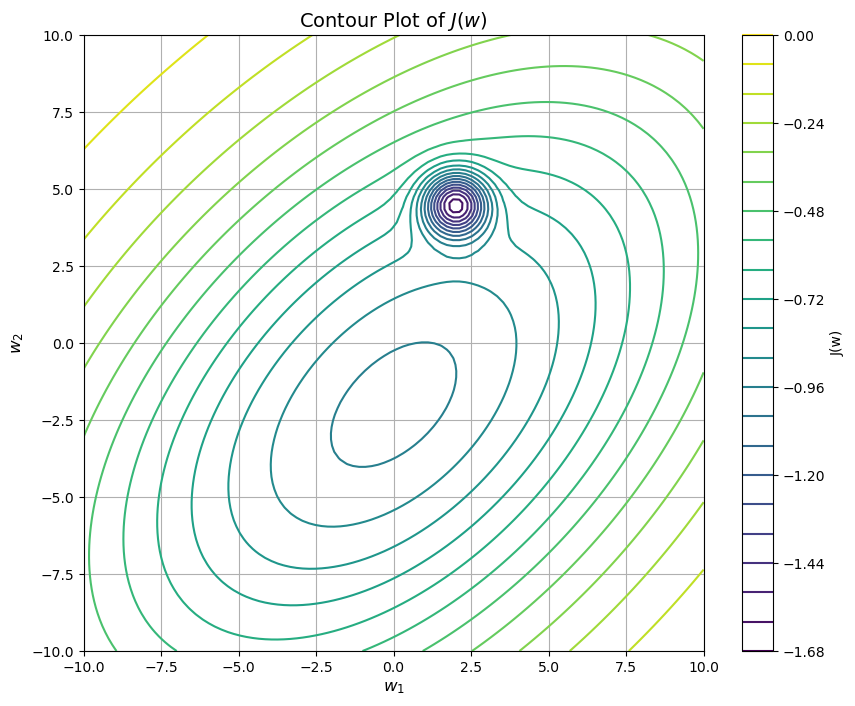

In [17]:
# TODO: Define function J(w)
def J(w1,w2):
    J=-np.exp(-(w1**2+w2**2-w1*w2-2*w1+4*w2+5)/100)-(2*np.exp(-(w1**2+w2**2-4*w1-9*w2+25)))
    return J
w1=np.linspace(-10,10,100)
w2=np.linspace(-10,10,100)
W1,W2=np.meshgrid(w1,w2)
J_w=J(W1,W2)
print(J_w.shape)


# TODO: Prepare contours plot of J(w)
plt.figure(figsize=(10, 8))
contour=plt.contour(W1,W2,J_w,levels=20, cmap="viridis")
plt.colorbar(contour, label="J(w)")
plt.title("Contour Plot of $J(w)$", fontsize=14)
plt.xlabel("$w_1$", fontsize=12)
plt.ylabel("$w_2$", fontsize=12)
plt.grid(True)
plt.show()



ii\. Obtain the gradient of the above function by hand.
            
  $Hint:   \nabla J(\boldsymbol{w}) = \left(
  \begin{array}{c}
    \frac{\partial J(\boldsymbol{w})}{\partial w_1} \\ %
    \frac{\partial J(\boldsymbol{w})}{\partial w_2}
  \end{array} \right)
$

iii\. Implement gradient descent algorithm described in the lecture to find the minimum of this
            function using the NumPy module. Plot the location of the new $\boldsymbol{w}$ after each iteration on the contour plot.

(100, 100) (100, 100)
(100, 100)


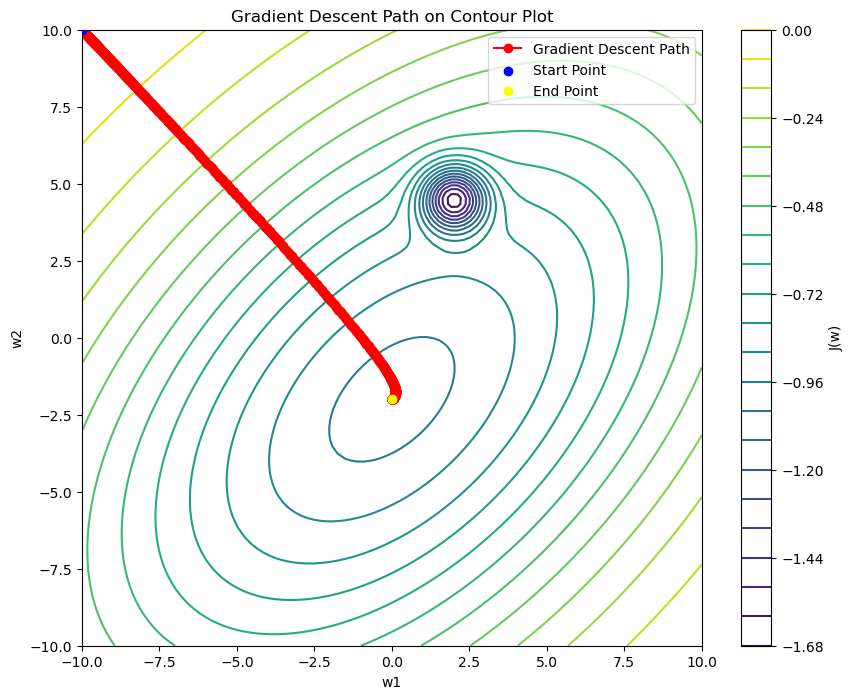

In [18]:
# TODO: Define function gradient_J(w)
def gradient_J(w1,w2):
    grad_w1=(np.exp(-0.01*(w1**2+w2**2-w1*w2-2*w1+4*w2+5))*(0.01*(2*w1-w2-2)))+(2*np.exp(-(w1**2+w2**2-4*w1-9*w2+25))*(2*w1-4))
    grad_w2=(np.exp(-0.01*(w1**2+w2**2-w1*w2-2*w1+4*w2+5))*(0.01*(2*w2-w1+4)))+(2*np.exp(-(w1**2+w2**2-4*w1-9*w2+25))*(2*w2-9))
    grad=np.array([grad_w1,grad_w2])
    return grad


# TODO: Define the gradient descent algorithm as function
def gradient_descent(w1,w2,lr):
    grad=gradient_J(w1,w2)
    w1-=lr*grad[0]
    w2-=lr*grad[1]
    return np.array([w1,w2])



# TODO: Train w 
# Store each update of w in an array to make plot later.
weights=[]
w1,w2=-10,10
weights.append([w1,w2])
lr=0.7
for i in range(1000):
    w1,w2=gradient_descent(w1,w2,lr)
    weights.append([w1,w2])

weights=np.array(weights)
# TODO: Prepare contour plot and mark each weight update on the plot.
w1_vals = np.linspace(-10, 10, 100)
w2_vals = np.linspace(-10, 10, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
print(W1.shape,W2.shape,)
J_w=J(W1,W2)
print(J_w.shape)
plt.figure(figsize=(10, 8))
contour=plt.contour(W1,W2,J_w,levels=20, cmap="viridis")
plt.colorbar(contour, label="J(w)")
plt.plot(weights[:, 0], weights[:, 1], marker='o', color='red', label="Gradient Descent Path")
plt.scatter(weights[0, 0], weights[0, 1], color='blue', label='Start Point', zorder=5)
plt.scatter(weights[-1, 0], weights[-1, 1], color='yellow', label='End Point', zorder=5)
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Gradient Descent Path on Contour Plot")
plt.legend()
plt.show()

### 3.3 Programming Task: Housing Price Regression Problem
The file __house\_prices.txt__ contains a data set of house prices: the
first column is the house size in square feet, the second column is the number
of bedrooms, the third column is the price in USD.


i\. Plot house prices vs. house sizes as a scatter plot.

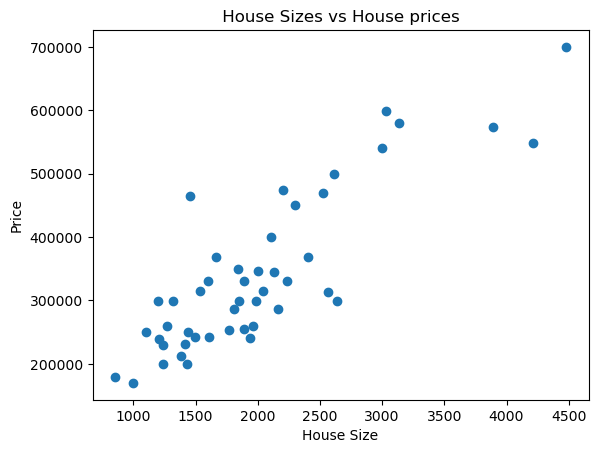

In [19]:
# TODO: Read and prepare scatter plot
data=np.loadtxt('./house_prices.txt',delimiter=',')
house_size=data[:,0].reshape(data[:,0].shape[0],1)
no_of_br=data[:,1].reshape(data[:,0].shape[0],1)
price=data[:,2].reshape(data[:,0].shape[0],1)
plt.scatter(house_size,price)
plt.xlabel("House Size")
plt.ylabel("Price")
plt.title(" House Sizes vs House prices ")
plt.show()

ii\. Next, fit the linear regression to these data points. You should not use
    any other python module besides NumPy to find the weights of the model.

* Consider the linear model $h_{\boldsymbol{w}}(\boldsymbol{x})=w_0 x_0 + w_1 x_1={\boldsymbol{w}}^\top\boldsymbol{x}$,
    where $x_1$ is the house size in the first column of __house\_prices.txt__, $x_0=1$ by convention, $\boldsymbol{x}={[x_0,x_1]}^\top$, 
    and $\boldsymbol{w}={[w_0, w_1]}^\top$. Define the cost function on the dataset:
 
    $J(\boldsymbol{w})=\frac{1}{2}\sum_{i=1}^{n} \left(h_{\boldsymbol{w}}(\boldsymbol{x}^{(i)})-y^{(i)}\right)^2.$

 
    Above, $n$ is the number of rows in __house_prices.txt__, $y^{(i)}$
    is the house price given in the third column of the file, $\boldsymbol{x}^{(i)} = {[1\
    x_1^{(i)}]}$ and $x_1^{(i)}$ is the house size from the first column and
    $i$th row of the file. $h_{\boldsymbol{w}}(\cdot)$ represents the linear regression model. Plot $J(\boldsymbol{w})$ as a function of $\boldsymbol{w}$ using the contour
    plot. You may rescale the data if required. 

(100, 100) (100, 100) (100, 100)


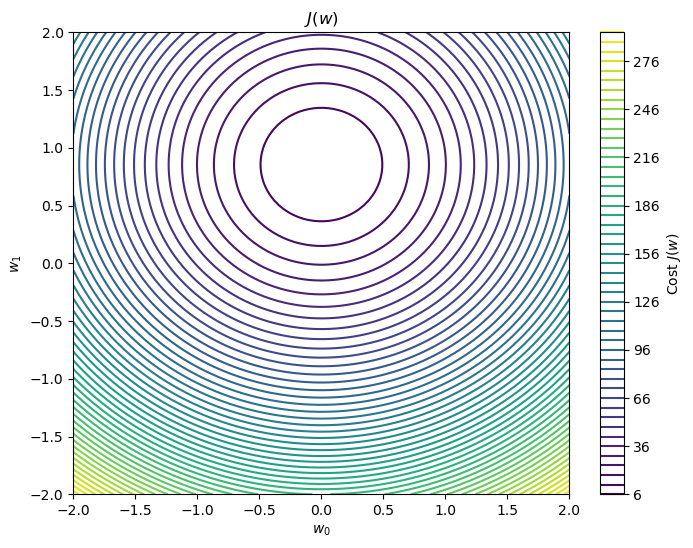

In [20]:
ones=np.ones(house_size.shape[0])
X=house_size
y=price
X_=np.c_[ones,X]
x_mean, x_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
x_rescaled = (X - x_mean) / x_std
y_rescaled = (y - y_mean) / y_std
X_=np.c_[ones,x_rescaled]

# TODO: Define function J(w)
def J_W(w0,w1,X,y):
    W=np.array([w0,w1]).reshape(2,1)
    predictions=X@W
    return 0.5*np.sum((predictions-y)**2)

# TODO: Define function gradient_J(w)
def gradient_Jw(x,y,w0,w1):
    W=np.array([w0,w1]).reshape(2,1)
    predictions=x@W
    grad=((predictions-y).T@x).reshape(2,1)
    grad_w0=grad[0,0]
    grad_w1=grad[1,0]


    # grad_w0=np.sum((predictions-y)*(x[:,0].reshape(y.shape)))
    # grad_w1=np.sum((predictions-y)*(x[:,1].reshape(y.shape)))
    return np.array([grad_w0, grad_w1])

w0_vals = np.linspace(-2, 2, 100)
w1_vals = np.linspace(-2, 2, 100)
J_vals = np.zeros((len(w0_vals), len(w1_vals)))
grad_w0 = np.zeros((len(w0_vals), len(w1_vals)))  
grad_w1 = np.zeros((len(w0_vals), len(w1_vals)))
for i, w0 in enumerate(w0_vals):
    for j, w1 in enumerate(w1_vals):
        J_vals[i, j] = J_W(w0,w1,X_,y_rescaled)
        gradient = gradient_Jw(X_, y_rescaled,w0,w1)
        grad_w0[i, j] = gradient[0]
        grad_w1[i, j] = gradient[1] 
# TODO: Plot the cost function
plt.figure(figsize=(8, 6))
W0, W1 = np.meshgrid(w0_vals, w1_vals,indexing='ij')
print(W0.shape,W1.shape,J_vals.shape)
plt.contour(W0, W1, J_vals, levels=50, cmap='viridis')
plt.title("$J({w})$")
plt.xlabel("$w_0$")
plt.ylabel("$w_1$")
plt.colorbar(label="Cost $J({w})$")
plt.show()



* Start with some initial value $\boldsymbol{w}$
and run the steps of the gradient descent algorithm (you may reuse revelant
parts of the solution from task 3.2). Plot the location of each new $\boldsymbol{w}$ on
the contour plot similar to the previous task.

The gradient at238 is [0.00099366 0.00056888]
Converges in 238 iterations as the weights aren't changing and the weights are [2.0148060590368688e-05, 0.8549991277678027]
The cost at start is 119.67475403054648 and after GD 6.321411089241486
[2.01480606e-05 8.54999128e-01]


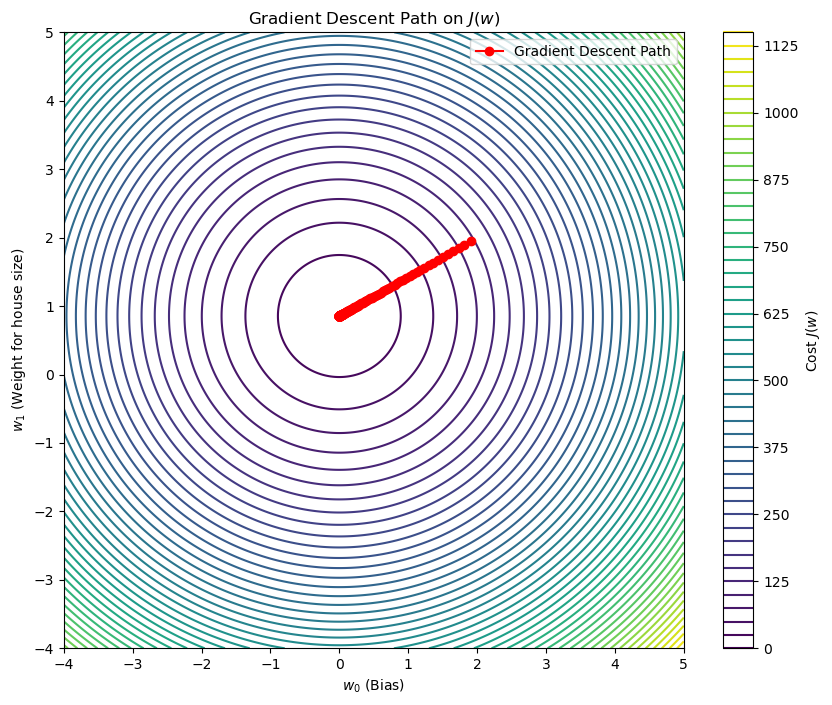

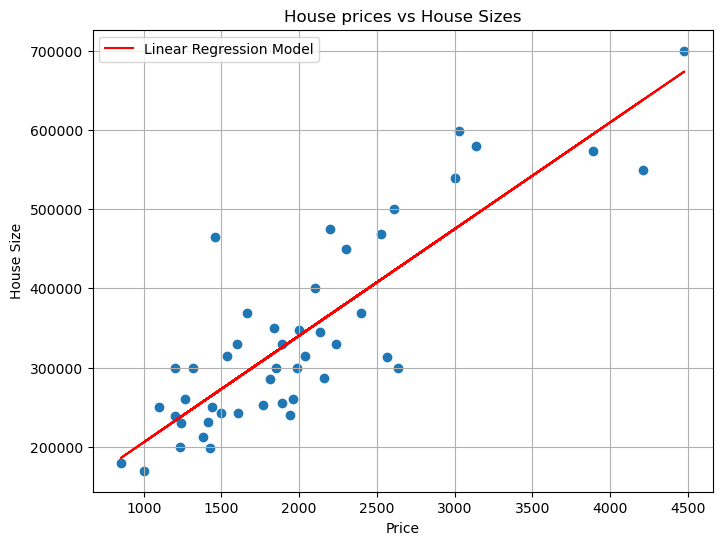

In [21]:
# TODO: Train w 
def gradient_descent(x,y,alpha=0.1,max_iters=100,tol=1e-3):
    w0,w1=2,2
    weights_history=[]
    #weights_history=[(w0,w1)]
    cost_history=[]
    #cost_history=[J_W(w0,w1,x,y)]
    for _ in range(max_iters):
        grad = gradient_Jw(x, y, w0, w1)
        w0_new = w0 - alpha * grad[0]
        w1_new = w1 - alpha * grad[1]
        cost = J_W(w0_new, w1_new, x, y)
        weights_history.append((w0_new, w1_new))
        cost_history.append(cost)
        if np.all(np.abs(grad) < tol):
            print(f"The gradient at{_} is {grad}")
            print(f"Converges in {_} iterations as the weights aren't changing and the weights are {[w0_new,w1_new]}")
            print(f"The cost at start is {cost_history[0]} and after GD {cost_history[-1]}")
            break
        w0, w1 = w0_new, w1_new
    return np.array(weights_history), np.array(cost_history)


# Store each update of w in an array to make plot later.
alpha = 0.001  # Learning rate
max_iters = 1000 # Maximum iterations
weights_history, cost_history = gradient_descent(X_, y_rescaled, alpha, max_iters)

# TODO: Prepare contour plot and mark each weight update on the plot.
w0_vals = np.linspace(-4, 5, 500)  # Adjust the range if needed
w1_vals = np.linspace(-4, 5, 500)
W0, W1 = np.meshgrid(w0_vals, w1_vals,indexing='ij')
J_vals_rescaled = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W1.shape[1]):
        J_vals_rescaled[i, j] = J_W(W0[i, j], W1[i, j], X_, y_rescaled)
print(weights_history[-1])
w0_vals_history = weights_history[:, 0]
w1_vals_history = weights_history[:, 1]
#print(W0.shape,W1.shape,J_vals_rescaled.shape)
plt.figure(figsize=(10, 8))
plt.contour(W0, W1, J_vals_rescaled, levels=50, cmap='viridis')  # Contour plot
plt.plot(w0_vals_history, w1_vals_history, 'ro-', label='Gradient Descent Path')  # Path
plt.title("Gradient Descent Path on $J({w})$")
plt.xlabel("$w_0$ (Bias)")
plt.ylabel("$w_1$ (Weight for house size)")
plt.legend()
plt.colorbar(label="Cost $J({w})$")
plt.show()

# OPTIONAL: Plot the resulting linear regression function
plt.figure(figsize=(8, 6))
plt.scatter(X,y)
final_w0,final_w1=weights_history[-1]
w1_original=final_w1*(y_std/x_std)
w0_original=y_mean-w1_original*x_mean+final_w0*y_std
predictions = w0_original+w1_original*X

#Plot the linear regression line
plt.plot(X, predictions,label="Linear Regression Model", color='red')
plt.xlabel("Price")
plt.ylabel("House Size")
plt.title("House prices vs House Sizes")
plt.legend()
plt.grid()
plt.show()

* Experiment by making changes to the learning rate of the gradient descent
algorithm. Observe how the path of the algorithm changes. Make sure that the
algorithm converges to the true minimum of the function $J(\boldsymbol{w})$.

The gradient at238 is [0.00099366 0.00056888]
Converges in 238 iterations as the weights aren't changing and the weights are [2.0148060590368688e-05, 0.8549991277678027]
The cost at start is 119.67475403054648 and after GD 6.321411089241486


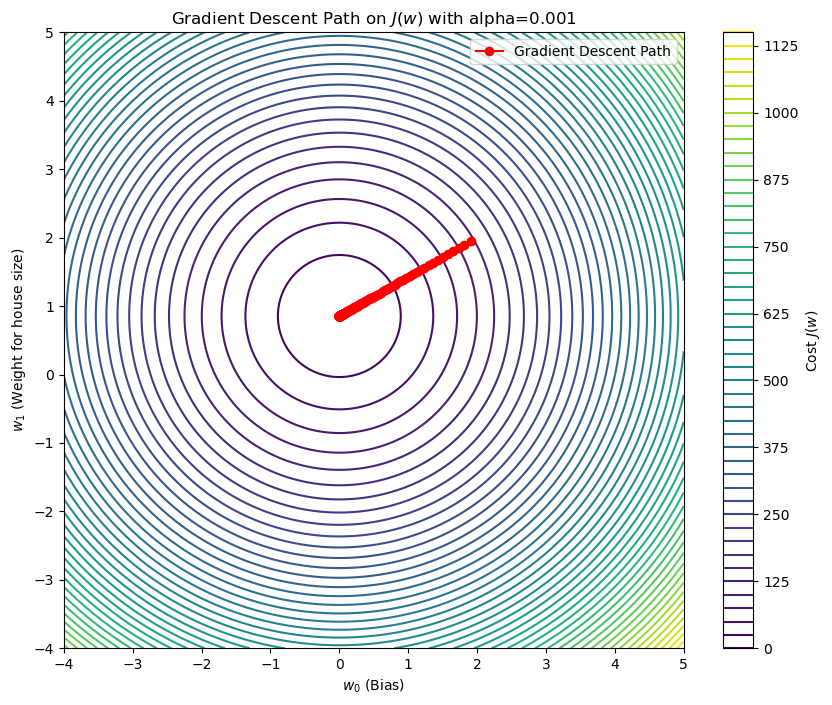

The gradient at116 is [0.001     0.0005725]
Converges in 116 iterations as the weights aren't changing and the weights are [1.9276541776170082e-05, 0.8549986288178751]
The cost at start is 108.76975129007889 and after GD 6.321411088169391


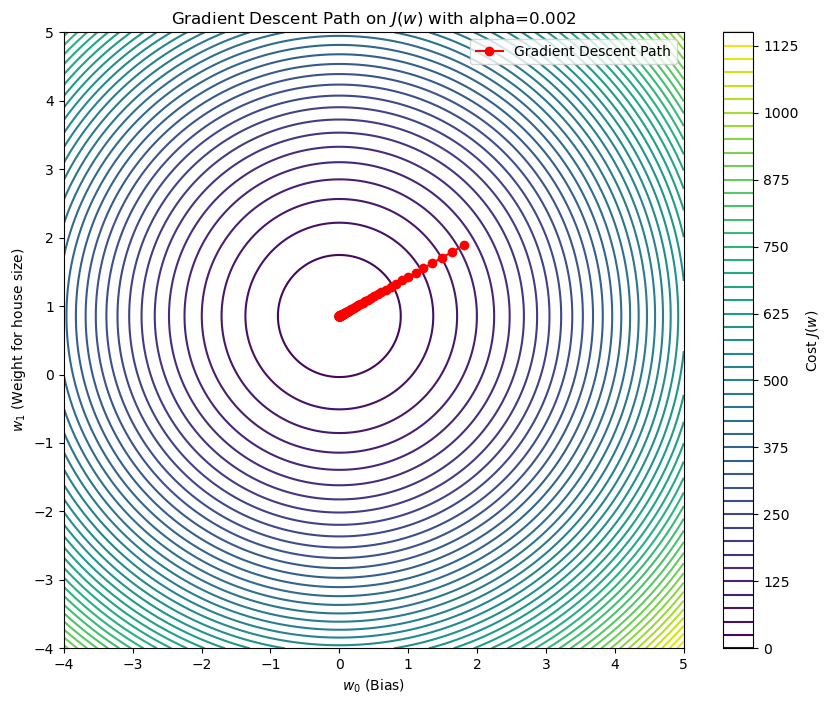

The gradient at76 is [0.00090492 0.00051807]
Converges in 76 iterations as the weights aren't changing and the weights are [1.6538785348428088e-05, 0.8549970614353364]
The cost at start is 98.41615804805343 and after GD 6.3214110851098795


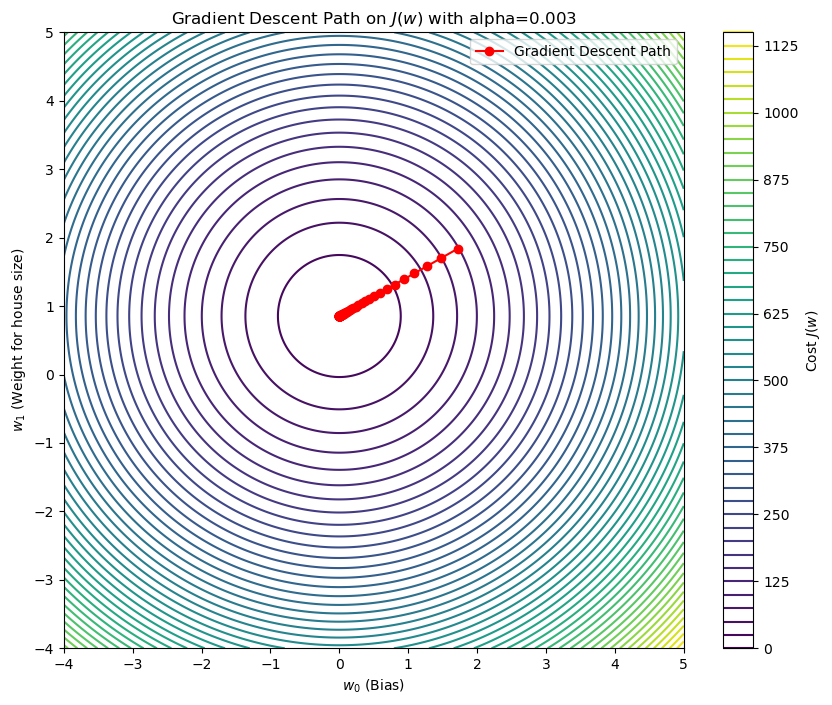

The gradient at43 is [0.00093448 0.000535  ]
Converges in 43 iterations as the weights aren't changing and the weights are [1.5210137581165712e-05, 0.8549963007762473]
The cost at start is 79.36320005932896 and after GD 6.321411083793663


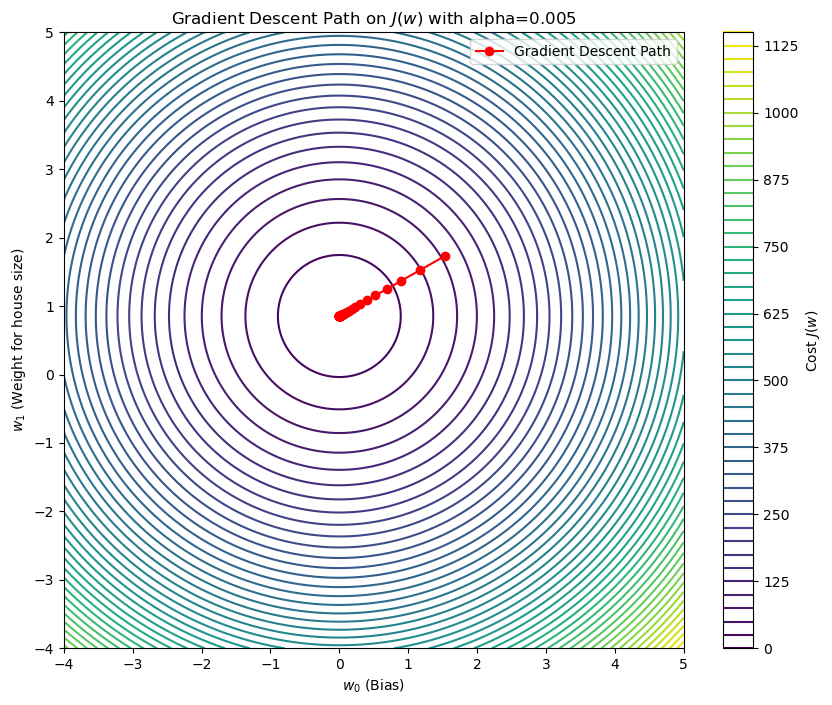

In [24]:
# TODO: Define alphas (learning rates) to test.
alphas=[0.001,0.002,0.003,0.005]



# TODO: Repeat experiment for each alpha and observe the contour plot in each case. You may use subplots in Matplotlib for the plots.
for i in alphas:
    weights_history, cost_history = gradient_descent(X_, y_rescaled, i, max_iters)
    w0_vals_history = weights_history[:, 0]
    w1_vals_history = weights_history[:, 1]
    plt.figure(figsize=(10, 8))
    plt.contour(W0, W1, J_vals_rescaled, levels=50, cmap='viridis')  # Contour plot
    plt.plot(w0_vals_history, w1_vals_history, 'ro-', label='Gradient Descent Path')  # Path
    plt.title("Gradient Descent Path on $J(w)$ with alpha={}".format(i))
    plt.xlabel("$w_0$ (Bias)")
    plt.ylabel("$w_1$ (Weight for house size)")
    plt.legend()
    plt.colorbar(label="Cost $J({w})$")
    plt.show()

iii\. Determine the weights of the model using the closed form solution for $\boldsymbol{w}$:
\begin{align}
    \hat{\mathbf{w}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^Ty
\end{align}
Above, $\mathbf{y} = [y^{(1)},..., y^{(n)}]^T$ and $\mathbf{X}$ is the data matrix whose rows are $x^{(i)}$. Is this the same point that you have found above using gradient descent?

In [25]:
# TODO: Compute the closed form solution
w=np.linalg.inv(X_.T@X_)@(X_.T)@y_rescaled
w

array([[-6.93889390e-17],
       [ 8.54987593e-01]])